In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('data/data.csv')

In [42]:

df = pd.read_csv('data/data.csv')

In [43]:
#Let's look at winning percentages...
blue_wins = sum(df['Winner'] == 'Blue')
red_wins = sum(df['Winner'] == 'Red')

In [44]:
print(blue_wins)
print(red_wins)

1591
3470


In [45]:
df.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 145, dtype: object

In [46]:
df['date'] = pd.to_datetime(df['date'])

In [47]:
df.dtypes

R_fighter               object
B_fighter               object
Referee                 object
date            datetime64[ns]
location                object
                     ...      
R_Height_cms           float64
R_Reach_cms            float64
R_Weight_lbs           float64
B_age                  float64
R_age                  float64
Length: 145, dtype: object

In [48]:
df_recent = df.loc[df['date'] >'01/03/2010']

In [49]:
blue_wins_recent = sum(df_recent['Winner'] == 'Blue')
red_wins_recent = sum(df_recent['Winner'] == 'Red')

In [50]:
print(blue_wins_recent)
print(red_wins_recent)

1591
2228


([<matplotlib.axis.XTick at 0x23dc90405c8>,
 <a list of 2 Text xticklabel objects>)

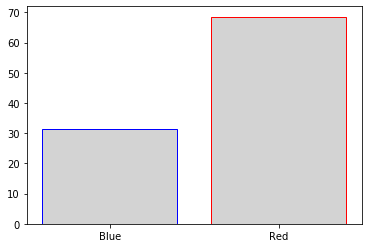

In [51]:
x_labels = ('Blue', 'Red')
y_pos = np.arange(len(x_labels))
wins = ((blue_wins / (blue_wins + red_wins))*100, (red_wins / (blue_wins + red_wins))*100)
plt.bar(y_pos, wins, align='center', edgecolor=['blue', 'red'], color='lightgrey')
plt.xticks(y_pos, x_labels)

x_labels = ('Blue', 'Red')
y_pos = np.arange(len(x_labels))
wins = ((blue_wins_recent / (blue_wins_recent + red_wins_recent))*100, (red_wins_recent / (blue_wins_recent + red_wins_recent))*100)
plt.bar(y_pos, wins, align='center', edgecolor=['blue', 'red'], color='lightgrey')
plt.xticks(y_pos, x_labels)

In [121]:
#Lets deal with missing data...
missing=(df.isnull().sum() / len(df)) * 100
missing = pd.DataFrame({'missing-ratio' :missing})
missing['feature'] = missing.index
over_10 = missing[missing['missing-ratio'] > 10]

remove_features = over_10['feature'].tolist()

AttributeError: 'list' object has no attribute 'dtype'

In [122]:
#Remove features with over 10% missing
df_filtered = df.drop(remove_features, axis=1)

In [126]:
df.shape

(5144, 146)

In [132]:
f_missing=(df_filtered.isnull().sum() / len(df_filtered)) * 100
f_missing = pd.DataFrame({'missing-ratio' :f_missing})
f_missing['feature'] = f_missing.index
f_missing = f_missing[f_missing['missing-ratio'] > 0]
display(f_missing)



,missing-ratio,feature
Referee,0.447123,Referee
B_Stance,3.090980,B_Stance
B_Height_cms,0.155521,B_Height_cms
B_Weight_lbs,0.116641,B_Weight_lbs
R_Stance,2.604977,R_Stance
R_Height_cms,0.077760,R_Height_cms
R_Reach_cms,6.143079,R_Reach_cms
R_Weight_lbs,0.058320,R_Weight_lbs
B_age,3.343701,B_age
R_age,1.244168,R_age


In [133]:
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')
df_filtered['B_Stance'] = df_filtered['B_Stance'].fillna('Orthodox')
df_filtered['B_Stance'] = df_filtered['B_Stance'].fillna('Orthodox')
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')

In [135]:
df_filtered.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.000000,5144.000000,5144.000000,5144.0,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,...,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5140.000000,4828.000000,5141.000000,4972.000000,5080.000000
mean,3.119362,0.429821,0.837286,0.0,1.588453,1.463647,8.920879,0.279938,0.016913,0.212286,...,1.177294,1.254860,0.777605,0.071345,3.598173,179.274089,183.664412,172.075861,29.171963,29.442323
std,0.631457,0.731325,1.306203,0.0,1.785490,1.866391,11.269340,1.116480,0.130457,0.526598,...,1.600135,1.801056,1.326056,0.277771,3.709519,8.638978,10.304375,35.164075,4.078538,4.141927
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000,26.000000
50%,3.000000,0.000000,0.000000,0.0,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,3.000000,1.000000,1.000000,0.0,2.000000,2.000000,13.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,0.000000,5.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,6.000000,13.000000,0.0,16.000000,13.000000,75.000000,16.000000,2.000000,5.000000,...,10.000000,11.000000,13.000000,2.000000,20.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [109]:
display(missing.head(40))

,missing-ratio,feature
R_fighter,0.000000,R_fighter
B_fighter,0.000000,B_fighter
Referee,0.447123,Referee
date,0.000000,date
location,0.000000,location
Winner,0.000000,Winner
title_bout,0.000000,title_bout
weight_class,0.000000,weight_class
no_of_rounds,0.000000,no_of_rounds
B_current_lose_streak,0.000000,B_current_lose_streak


In [90]:
drop_features = []
drop_list = missing['Missing Ratio'] > 24
for z in drop_list:
    if z is True:
        drop_features.append(z.index)

AttributeError: 'bool' object has no attribute 'index'

In [87]:
drop_list

missing-ratio                 True
B_avg_opp_PASS                True
B_avg_opp_CLINCH_landed       True
B_avg_opp_DISTANCE_att        True
B_avg_opp_DISTANCE_landed     True
                             ...  
Referee                      False
B_Height_cms                 False
B_Weight_lbs                 False
R_Height_cms                 False
R_Weight_lbs                 False
Name: Missing Ratio, Length: 110, dtype: bool